# Dataset selection
Loading MNIST dataset for classification digits.

In [38]:
# loading MNIST dataset from openml
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False, parser='auto')

In [39]:
X, y = mnist.data, mnist.target.astype('int')

In [40]:
print(X, y, sep='\n')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[5 0 4 ... 4 5 6]


In [41]:
# get the idea of the shape 
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


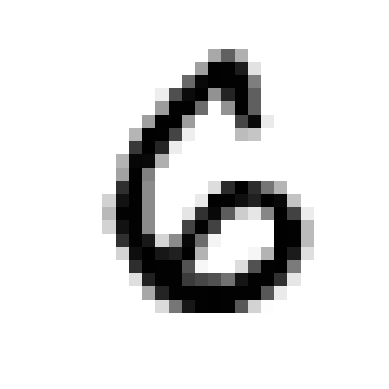

In [66]:
# plot to see digit
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    
some_digit = X[np.random.randint(0, 70000)]
plot_digit(some_digit)
plt.show()

## Train test data split
since openml mnist dataset already contain splitted and suffuled data,<br>
where first 60,000 rows are train data and rest 10,000 rows are test data,
so I will use it as it is.

In [48]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[10000:]

### Let's start with binary classification
To make mnist digit classification problem binary I will label digit `3` data as target features 

In [49]:
# true for all 3 and false for rest
y_train_6 = (y_train == 6)
y_test_6 = (y_test == 6)

## Training a Model
### SGDClassifier model training:

In [52]:
from sklearn.linear_model import SGDClassifier

# model instance
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_6)

sgd_clf.predict([some_digit])

array([False])

In [67]:
sgd_clf.predict([some_digit])

array([False])

# Performance Measure `[IMP]`
+ ### Using Cross validation
working procedure: k-fold cross_val_score, split dataset into k part train model on each part then give the average score.

In [69]:
# Cross validation 
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_6, cv=3, scoring='accuracy')

array([0.9829 , 0.98025, 0.9804 ])

In [70]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_6)

# predicting 
print(dummy_clf.predict(X_train))

cross_val_score(dummy_clf, X_train, y_train_6, cv=3, scoring='accuracy')

[False False False ... False False False]


array([0.9014 , 0.90135, 0.90135])

#### Q: is this performance measure satisfatory?
Answer: No, as Accuracy score is given by <br>
$$Accuracy Score = \frac {TP+TN} {TP+TN+FP+FN}$$
where,<br>
TP = True Positive<br>
TN = True Negative<br>
FP = False Positive<br>
FN = False Negative<br>
problem : what if the data contain only about 10% of the total data as True that is if the data is skewed (means frequency of the label not uniformly distributed) like in this case

In [72]:
print('Total sample:', X_train.shape[0])
print('Total True label:', y_train_6.astype('int').sum())
print("Percent of Ture Label:", y_train_6.astype('int').sum() / X_train.shape[0] * 100)

Total sample: 60000
Total True label: 5918
Percent of Ture Label: 9.863333333333333


dataset contain only about 10% label so when a model predict about 90% of train data as False it's accuracy becomes about `0.9`.<br>
**That is why Accuracy Score is not `SATISFACTORY` when the dataset is Skewed**

+ ### Confusing Matrix